In [37]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [38]:
data = pd.read_csv('../data/student.csv')

In [39]:
data.head()

,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


## 1. Implement model using Scikit-Learn

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [41]:
math = data.Math.values
read = data.Reading.values
write = data.Writing.values

In [42]:
# Prepare X and Y values
X = np.array([math, read]).T
Y = np.array(write)

In [55]:
X.shape

(1000, 2)

In [44]:
reg = LinearRegression()

In [45]:
# Train the model
reg = reg.fit(X, Y)

In [46]:
# Print Coefficients and Intercepts
print('Coefficients: ', reg.coef_)
print('Intercepts: ', reg.intercept_)

Coefficients:  [0.09600221 0.91049989]
Intercepts:  -1.4624373849419783


## => Our model: 

### S_writing = -1.4624373849419783 + 0.09600221 S_read + 0.91049989 S_math

In [47]:
Y_pred = reg.predict(X)

In [48]:
rmse = np.sqrt(mean_squared_error(Y, Y_pred))
r2 = reg.score(X, Y)

In [49]:
print(rmse)

4.572887051836439


In [50]:
print(r2)

0.9098901726717316


In [51]:
X

array([[48, 68],
       [62, 81],
       [79, 80],
       ...,
       [89, 87],
       [83, 82],
       [66, 66]])

# 2. Visualize the model

In [52]:
S_math, S_reading = np.meshgrid(np.linspace(math.min(), math.max(), 100), 
                                                            np.linspace(read.min(), read.max(), 100))

In [53]:
S_writing = -1.4624373849419783 + 0.09600221 * S_reading + 0.91049989 * S_math

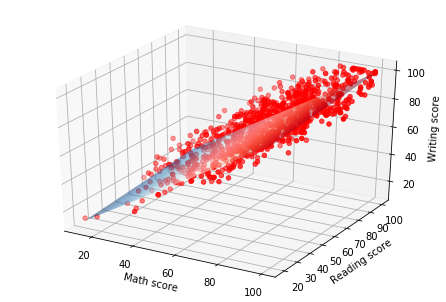

In [54]:
# Plotting the scores with Scatter plot
fig = plt.figure()
ax = Axes3D(fig)
#ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(S_math, S_reading, S_writing, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)
ax.scatter(math, read, write, color='r')

ax.set_xlabel('Math score')
ax.set_ylabel('Reading score')
ax.set_zlabel('Writing score')

plt.show()
